# Overview

The script digit_classification_knn.py iteratively projects subjects data to shared space over differenet number of features. Within that n-feature iteration, it then performs knn-classification with different numbers of neighbors. It also performs two kinds of classification schemes: cross-subject & cross-run, cross-subject & within-run. 

In [1]:
import os 
from os.path import join as pjoin
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import seaborn as sns
import runpy
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
sns.set_context('talk')

In [3]:
knn_outdir = '/data/BnB_USER/oliver/somato/scratch/digit_classification_knn'
proj_outdir='/data/BnB_USER/oliver/somato/scratch/crossval_projection'
nfeat_range=(5, 10, 20, 50, 100)
nneigh_range=range(3, 101, 2)
nsubs = 12
nruns = 2

# Cross-subjects, cross-runs

In [4]:
# load our classification results into array
knn_results = np.zeros((len(nfeat_range), len(nneigh_range), nsubs, nruns))
for feat_i, nfeat in enumerate(nfeat_range):
    for neigh_i, nneigh in enumerate(nneigh_range):
        npz_f = pjoin(knn_outdir,  'nfeat-%i_nneigh-%i.npz' % (nfeat, nneigh))
        with open(npz_f, 'rb') as f:
            res = np.load(f)
        knn_results[feat_i, neigh_i,:,:] = res

In [5]:
print(knn_results.shape)

(5, 49, 12, 2)


In [6]:
knn_av = np.average(knn_results, axis=(2,3))

In [7]:
sns.set_style('whitegrid')

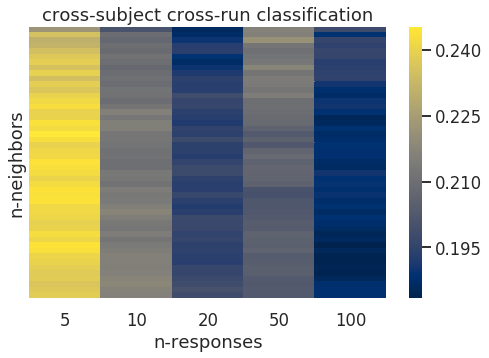

In [62]:
fig = plt.figure(figsize=(8,5))
sns.heatmap(knn_av.T, cmap='cividis', xticklabels=nfeat_range, yticklabels=[])
plt.title('cross-subject cross-run classification')
plt.ylabel('n-neighbors')
plt.xlabel('n-responses')
fig.savefig('plots/acc_crosssub_crossrun.png', dpi=300, bbox_inches='tight')
plt.show()

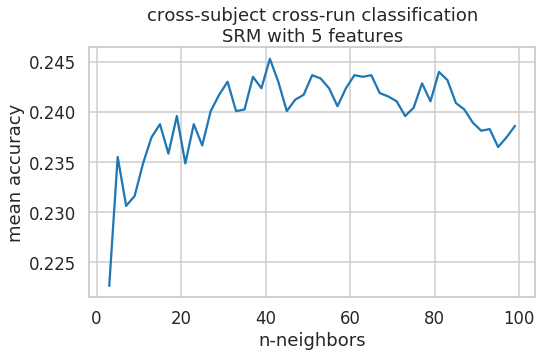

In [52]:
fig = plt.figure(figsize=(8,5))
sns.lineplot(y=knn_av[0], x=nneigh_range)
plt.title('cross-subject cross-run classification\nSRM with 5 features')
plt.ylabel('mean accuracy')
plt.tight_layout()
plt.xlabel('n-neighbors')
plt.savefig('plots/acc_crosssub_crossrun_5feat.png', dpi=300, bbox_inches='tight')
plt.show()

**Conclusion:** For cross-subject cross-run classification... 
- accuracies are barely above chance level
- low number of features and ~ 40 KNN neighbors yields best performance.

# Within-run, across subjects

load projected data and iterate over nfeatures and nneighbors in this notebook. Alternatively, rerun the script digit_classification_knn.py, which has been updated by adding the within-run classification and saving the results.

In [10]:
file_globals = runpy.run_path('digit_classification_knn.py')
get_digit_indices = file_globals['get_digit_indices']
digit_indices_to_labels = file_globals['digit_indices_to_labels']
knn_within_run = file_globals['knn_within_run']
knn_within_sub = file_globals['knn_within_sub']

/data/BnB_USER/oliver/somato/raw/venvs/somato_env/lib/python3.5/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [11]:
# run within-run classification in this notebook, to skip data projection when rerunning the script.

# prepare results array
withinrun_results = np.zeros((len(nfeat_range), len(nneigh_range), nsubs, nruns))

# iterate over nfeatures and nneighbors
for feat_i, nfeat in enumerate(nfeat_range):
    proj_outpath = pjoin(proj_outdir, 'proj_data_nfeats-%i.npy' % nfeat)
    if os.path.exists(proj_outpath):
        with open(proj_outpath, 'rb') as f:
            projected_data = np.load(f)
    for neigh_i, nneigh in enumerate(nneigh_range):
        #print('starting within-run classification for feature %i neighbors %i' % (nfeat, nneigh))
        accuracies = knn_within_run(projected_data, nneighs=nneigh)
        withinrun_results[feat_i, neigh_i, :, :]= accuracies

In [12]:
print(withinrun_results)

[[[[0.18359375 0.20703125]
   [0.171875   0.24609375]
   [0.2890625  0.21484375]
   ...
   [0.25       0.22265625]
   [0.23046875 0.31640625]
   [0.16015625 0.3359375 ]]

  [[0.19140625 0.21875   ]
   [0.1484375  0.24609375]
   [0.30078125 0.23046875]
   ...
   [0.2578125  0.24609375]
   [0.22265625 0.33984375]
   [0.13671875 0.3515625 ]]

  [[0.18359375 0.1953125 ]
   [0.14453125 0.24609375]
   [0.3203125  0.234375  ]
   ...
   [0.28125    0.2578125 ]
   [0.21484375 0.33203125]
   [0.13671875 0.36328125]]

  ...

  [[0.23828125 0.18359375]
   [0.1328125  0.30859375]
   [0.30078125 0.21875   ]
   ...
   [0.24609375 0.26171875]
   [0.140625   0.37109375]
   [0.13671875 0.4453125 ]]

  [[0.24609375 0.18359375]
   [0.125      0.30859375]
   [0.30078125 0.20703125]
   ...
   [0.23046875 0.2578125 ]
   [0.1484375  0.37890625]
   [0.12890625 0.4375    ]]

  [[0.24609375 0.19140625]
   [0.13671875 0.3203125 ]
   [0.3125     0.2109375 ]
   ...
   [0.234375   0.26171875]
   [0.16796875 0.375   

In [13]:
withinrun_av = np.average(withinrun_results, axis=(2,3))

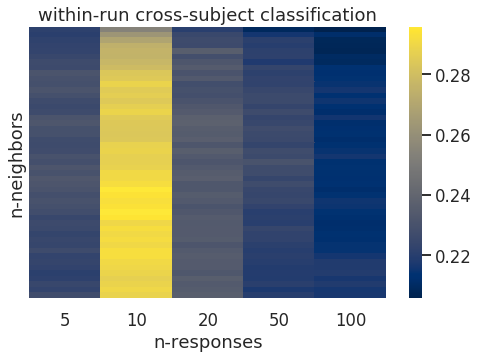

In [63]:
fig = plt.figure(figsize=(8,5))
sns.heatmap(withinrun_av.T, cmap='cividis', xticklabels=nfeat_range, yticklabels=[])
plt.title('within-run cross-subject classification')
plt.ylabel('n-neighbors')
plt.xlabel('n-responses')
fig.savefig('plots/acc_inrun_crosssub.png', dpi=300, bbox_inches='tight')
plt.show()

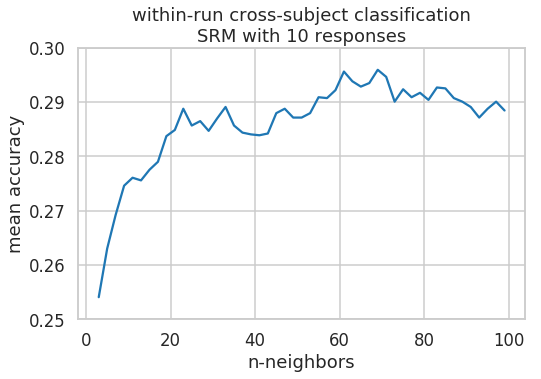

In [54]:
fig = plt.figure(figsize=(8,5))
sns.lineplot(y=withinrun_av[1], x=nneigh_range)
plt.title('within-run cross-subject classification\nSRM with 10 responses')
plt.ylabel('mean accuracy')
plt.xlabel('n-neighbors')
plt.ylim((.25,.3))
fig.savefig('plots/acc_inrun_crosssub_10feat.png', dpi=300, bbox_inches='tight')
plt.show()

**Conclusion:**
- within-run yields slightly better classification accuracy overall, but still suboptimal
- here, 10 features show best performance

# Within-subject, cross-run

In [16]:
withinsub_results = np.zeros((len(nfeat_range), len(nneigh_range), nsubs, nruns))

# iterate over nfeatures and nneighbors
for feat_i, nfeat in enumerate(nfeat_range):
    proj_outpath = pjoin(proj_outdir, 'proj_data_nfeats-%i.npy' % nfeat)
    if os.path.exists(proj_outpath):
        with open(proj_outpath, 'rb') as f:
            projected_data = np.load(f)
    for neigh_i, nneigh in enumerate(nneigh_range):
        print('starting within-run classification for feature %i neighbors %i' % (nfeat, nneigh))
        accuracies = knn_within_sub(projected_data, nneigh=nneigh)
        withinsub_results[feat_i, neigh_i, :, :]= accuracies

starting within-run classification for feature 5 neighbors 3
starting within-run classification for feature 5 neighbors 5
starting within-run classification for feature 5 neighbors 7
starting within-run classification for feature 5 neighbors 9
starting within-run classification for feature 5 neighbors 11
starting within-run classification for feature 5 neighbors 13
starting within-run classification for feature 5 neighbors 15
starting within-run classification for feature 5 neighbors 17
starting within-run classification for feature 5 neighbors 19
starting within-run classification for feature 5 neighbors 21
starting within-run classification for feature 5 neighbors 23
starting within-run classification for feature 5 neighbors 25
starting within-run classification for feature 5 neighbors 27
starting within-run classification for feature 5 neighbors 29
starting within-run classification for feature 5 neighbors 31
starting within-run classification for feature 5 neighbors 33
starting wit

starting within-run classification for feature 20 neighbors 71
starting within-run classification for feature 20 neighbors 73
starting within-run classification for feature 20 neighbors 75
starting within-run classification for feature 20 neighbors 77
starting within-run classification for feature 20 neighbors 79
starting within-run classification for feature 20 neighbors 81
starting within-run classification for feature 20 neighbors 83
starting within-run classification for feature 20 neighbors 85
starting within-run classification for feature 20 neighbors 87
starting within-run classification for feature 20 neighbors 89
starting within-run classification for feature 20 neighbors 91
starting within-run classification for feature 20 neighbors 93
starting within-run classification for feature 20 neighbors 95
starting within-run classification for feature 20 neighbors 97
starting within-run classification for feature 20 neighbors 99
starting within-run classification for feature 50 neigh

In [17]:
withinsub_results.shape
withinsub_av = np.average(withinsub_results, axis=(2,3))

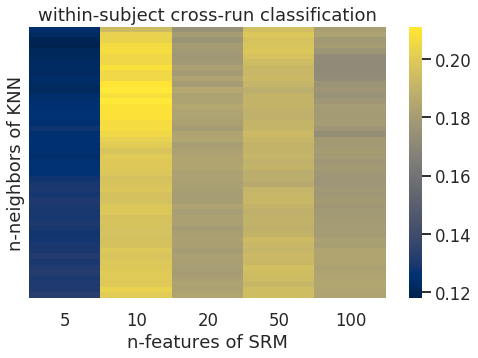

In [64]:
fig = plt.figure(figsize=(8,5))
sns.heatmap(withinsub_av.T, cmap='cividis', xticklabels=nfeat_range, yticklabels=[])
plt.title('within-subject cross-run classification')
plt.ylabel('n-neighbors of KNN')
plt.xlabel('n-features of SRM')
fig.savefig('plots/acc_insub_crossrun.png', dpi=300, bbox_inches='tight')
plt.show()

(0.19, 0.22)

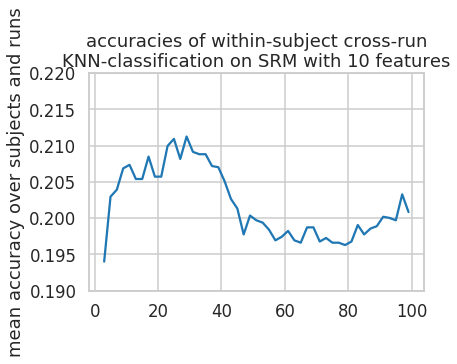

In [19]:
sns.lineplot(y=withinsub_av[1], x=nneigh_range)
plt.title('accuracies of within-subject cross-run\nKNN-classification on SRM with 10 features')
plt.ylabel('mean accuracy over subjects and runs')
plt.ylim((.19,.22))

**Conclusion:**

- the performance of within-subject classification is at chance level